In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("educ_inc.csv")
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [3]:
df['Year']=pd.to_datetime(df['Year'])
df

C:\Users\vigne\AppData\Local\Temp\ipykernel_10228\2618838963.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year']=pd.to_datetime(df['Year'])


,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,2008-01-01,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,2008-01-01,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,2008-01-01,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,2008-01-01,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,2008-01-01,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,2014-01-01,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,2014-01-01,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,2014-01-01,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,2014-01-01,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [4]:
d = df[df['Year'].dt.year==2014]
d

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
881,2014-01-01,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1356
882,2014-01-01,00 to 17,Female,High school or equivalent,"B: 5,000 to 9,999",1583
883,2014-01-01,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",1664
884,2014-01-01,00 to 17,Male,High school or equivalent,"B: 5,000 to 9,999",2048
885,2014-01-01,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
...,...,...,...,...,...,...
1021,2014-01-01,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,2014-01-01,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,2014-01-01,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,2014-01-01,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


1.	Group the table by Educational Attainment and sum the Population Count in each category.

In [5]:
df.groupby("Educational Attainment")['Population Count'].sum()

Educational Attainment
Bachelor's degree or higher       54617676
College, less than 4-yr degree    52137494
High school or equivalent         42942926
No high school diploma            40668871
Name: Population Count, dtype: int64

2.	Analyse the percentage distribution of educational attainment among adult Californians.

In [6]:
df[(df["Age"] != "00 to 17")].groupby("Educational Attainment")[["Population Count"]].sum()/df.groupby("Educational Attainment")[["Population Count"]].sum()*100

,Population Count
Educational Attainment,
Bachelor's degree or higher,99.973135
"College, less than 4-yr degree",99.824422
High school or equivalent,99.732480
No high school diploma,76.477038


3.	Using pivot , get a contingency table (a table of counts) of adult Californians cross-classified by Educational Attainment and Personal Income.

In [7]:
contigencyTable = pd.pivot_table(df,index='Educational Attainment',columns='Personal Income',aggfunc=len,fill_value=0)
contigencyTable

Age                    \
Personal Income                A: 0 to 4,999 B: 5,000 to 9,999   
Educational Attainment                                           
Bachelor's degree or higher               30                28   
College, less than 4-yr degree            36                35   
High school or equivalent                 35                36   
No high school diploma                    42                42   

                                                                        \
Personal Income                C: 10,000 to 14,999 D: 15,000 to 24,999   
Educational Attainment                                                   
Bachelor's degree or higher                     29                  30   
College, less than 4-yr degree                  34                  36   
High school or equivalent                       33                  32   
No high school diploma                          42                  39   

                                                                        \
Personal Income                E: 25,000 to 34,999 F: 35,000 to 49,999   
Educational Attainment                                                   
Bachelor's degree or higher                     29                  28   
College, less than 4-yr degree                  30                  29   
High school or equivalent                       30                  28   
No high school diploma                          33                  33   

                                                                       \
Personal Income                G: 50,000 to 74,999 H: 75,000 and over   
Educational Attainment                                                  
Bachelor's degree or higher                     28                 29   
College, less than 4-yr degree                  29                 29   
High school or equivalent                       28                 28   
No high school diploma                          30                 26   

                                      Gender                    ...  \
Personal Income                A: 0 to 4,999 B: 5,000 to 9,999  ...   
Educational Attainment                                          ...   
Bachelor's degree or higher               30                28  ...   
College, less than 4-yr degree            36                35  ...   
High school or equivalent                 35                36  ...   
No high school diploma                    42                42  ...   

                                  Population Count                     \
Personal Income                G: 50,000 to 74,999 H: 75,000 and over   
Educational Attainment                                                  
Bachelor's degree or higher                     28                 29   
College, less than 4-yr degree                  29                 29   
High school or equivalent                       28                 28   
No high school diploma                          30                 26   

                                        Year                    \
Personal Income                A: 0 to 4,999 B: 5,000 to 9,999   
Educational Attainment                                           
Bachelor's degree or higher               30                28   
College, less than 4-yr degree            36                35   
High school or equivalent                 35                36   
No high school diploma                    42                42   

                                                                        \
Personal Income                C: 10,000 to 14,999 D: 15,000 to 24,999   
Educational Attainment                                                   
Bachelor's degree or higher                     29                  30   
College, less than 4-yr degree                  34                  36   
High school or equivalent                       33                  32   
No high school diploma                          42                  39   

                                    

In [8]:
df.columns

Index(['Year', 'Age', 'Gender', 'Educational Attainment', 'Personal Income',
       'Population Count'],
      dtype='object')

In [9]:
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,2008-01-01,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,2008-01-01,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,2008-01-01,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,2008-01-01,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,2008-01-01,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,2014-01-01,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,2014-01-01,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,2014-01-01,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,2014-01-01,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


4.	Draw a bar chart to compare the personal income distributions of adult Californians who have no high diploma with those who have completed a Bachelor's degree or higher.  (The difference in the distributions would be striking. There is a clear positive association between educational attainment and personal income).

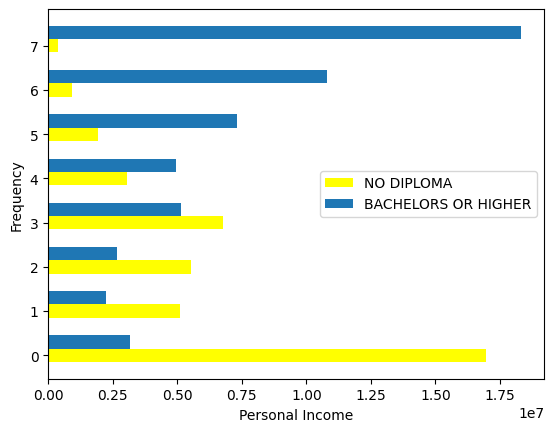

In [10]:
no_dip = df[df['Educational Attainment']=="No high school diploma"]
no_dip = no_dip.groupby(by="Personal Income")["Population Count"].sum()

bach = df[df["Educational Attainment"]=="Bachelor's degree or higher"]
bach = bach.groupby(by="Personal Income")["Population Count"].sum()

x1 = no_dip.index.to_numpy()
x2 = bach.index.to_numpy()

y1=no_dip.values
y2=bach.values

x=np.arange(len(x1))

width=0.3

plt.barh(x,y1,width,color='yellow',label="NO DIPLOMA")
plt.barh(x+width,y2,width,label="BACHELORS OR HIGHER")
# plt.legend()
plt.yticks=(x,x1)
plt.ylabel("Frequency")
plt.xlabel("Personal Income")
plt.legend()